# UNDERSAMPLING

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random as rd
import scipy.stats
from sklearn.utils import resample

## Load Data

In [ ]:
df_wiki = pd.read_csv("wiki.csv") 
df_wiki

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,Qu3,Qu4,Qu5,Vis1,Vis2,Vis3,Im1,Im2,Im3,SA1,SA2,SA3,Use1,Use2,Use3,Use4,Use5,Pf1,Pf2,Pf3,JR1,JR2,BI1,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,4,4,3,5,5,3,4,4,3,3,2,2,3,3,3,1,2,4,2,4,4,4,3,1,1,2,4,1,1,3,4,1,2,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,2,3,3,4,4,3,3,4,4,4,3,3,2,3,3,1,1,2,1,4,4,4,2,2,1,1,2,1,1,1,4,3,2,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,2,2,2,4,4,3,3,3,2,2,2,5,3,2,3,2,2,4,3,4,2,4,1,1,1,1,1,3,3,3,4,3,1,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,3,3,4,3,3,3,4,3,3,4,3,3,3,3,4,3,2,2,3,5,5,5,3,3,3,3,3,4,4,4,5,4,3,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,4,3,5,5,4,3,4,4,4,5,4,3,4,4,4,4,3,2,3,5,5,5,3,3,5,5,5,5,5,5,3,3,5,5,5,5,4,4,5,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5,1,21,2,?,?,2,0,3,3,3,5,5,2,4,5,3,3,4,5,2,2,2,1,2,2,2,3,3,4,?,?,2,2,2,1,2,1,5,4,2,2,2,2,2,2,?,?,?,?,?
909,53,0,6,0,25,2,?,?,6,0,3,3,4,5,4,3,4,4,4,4,4,3,3,2,3,3,2,?,2,?,4,5,3,2,3,3,5,2,2,4,3,3,4,4,4,3,3,4,4,4,4,1,1
910,39,0,5,1,9,2,?,?,4,0,3,3,3,5,4,3,3,4,3,3,2,5,2,2,4,1,1,2,?,4,5,4,3,1,1,1,3,5,5,3,3,1,2,2,5,4,3,?,5,5,5,4,1
911,40,0,3,1,10,2,?,?,2,0,3,3,5,5,4,2,4,4,4,4,3,2,5,3,2,5,4,5,4,5,5,5,3,1,5,5,?,1,2,4,4,2,5,5,1,5,2,2,4,4,2,1,1


In [ ]:
#mengetahui jumlah baris dan kolom
df_wiki[df_wiki.duplicated()].shape

(0, 53)

In [ ]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             913 non-null    int64 
 1   GENDER          913 non-null    int64 
 2   DOMAIN          913 non-null    object
 3   PhD             913 non-null    int64 
 4   YEARSEXP        913 non-null    object
 5   UNIVERSITY      913 non-null    int64 
 6   UOC_POSITION    913 non-null    object
 7   OTHER_POSITION  913 non-null    object
 8   OTHERSTATUS     913 non-null    object
 9   USERWIKI        913 non-null    object
 10  PU1             913 non-null    object
 11  PU2             913 non-null    object
 12  PU3             913 non-null    object
 13  PEU1            913 non-null    object
 14  PEU2            913 non-null    object
 15  PEU3            913 non-null    object
 16  ENJ1            913 non-null    object
 17  ENJ2            913 non-null    object
 18  Qu1       

# Replacing "?" with mean & modus

In [ ]:
#Cek apakah ada data yang kosong atau tidak
df_wiki.isnull().sum()

AGE               0
GENDER            0
DOMAIN            0
PhD               0
YEARSEXP          0
UNIVERSITY        0
UOC_POSITION      0
OTHER_POSITION    0
OTHERSTATUS       0
USERWIKI          0
PU1               0
PU2               0
PU3               0
PEU1              0
PEU2              0
PEU3              0
ENJ1              0
ENJ2              0
Qu1               0
Qu2               0
Qu3               0
Qu4               0
Qu5               0
Vis1              0
Vis2              0
Vis3              0
Im1               0
Im2               0
Im3               0
SA1               0
SA2               0
SA3               0
Use1              0
Use2              0
Use3              0
Use4              0
Use5              0
Pf1               0
Pf2               0
Pf3               0
JR1               0
JR2               0
BI1               0
BI2               0
Inc1              0
Inc2              0
Inc3              0
Inc4              0
Exp1              0
Exp2              0


In [ ]:
#Mengecek missing value berupa ?,NaN,-,dsb yang pada tiap kolom
print("AGE: ",(df_wiki['AGE'].unique()))
print("GENDER: ",(df_wiki['GENDER'].unique()))
print("PhD: ",(df_wiki['PhD'].unique()))
print("YEARSEXP: ",(df_wiki['YEARSEXP'].unique()))
print("UNIVERSITY: ",(df_wiki['UNIVERSITY'].unique()))
print("UOC_POSITION: ",(df_wiki['UOC_POSITION'].unique()))
print("OTHER_POSITION: ",(df_wiki['OTHER_POSITION'].unique()))
print("OTHERSTATUS: ",(df_wiki['OTHERSTATUS'].unique()))
print("USERWIKI: ",(df_wiki['USERWIKI'].unique()))
print("PU1: ",(df_wiki['PU1'].unique()))
print("PU2: ",(df_wiki['PU2'].unique()))
print("PU3: ",(df_wiki['PU3'].unique()))
print("PEU1: ",(df_wiki['PEU1'].unique()))
print("PEU2: ",(df_wiki['PEU2'].unique()))
print("PEU3: ",(df_wiki['PEU3'].unique()))
print("ENJ1: ",(df_wiki['ENJ1'].unique()))
print("ENJ2: ",(df_wiki['ENJ2'].unique()))
print("Qu1: ",(df_wiki['Qu1'].unique()))
print("Qu2: ",(df_wiki['Qu2'].unique()))
print("Qu3: ",(df_wiki['Qu3'].unique()))
print("Qu4: ",(df_wiki['Qu4'].unique()))
print("Qu5: ",(df_wiki['Qu5'].unique()))
print("Vis1: ",(df_wiki['Vis1'].unique()))
print("Vis2: ",(df_wiki['Vis2'].unique()))
print("Vis3: ",(df_wiki['Vis3'].unique()))
print("Im1: ",(df_wiki['Im1'].unique()))
print("Im2: ",(df_wiki['Im2'].unique()))
print("Im3: ",(df_wiki['Im3'].unique()))
print("SA1: ",(df_wiki['SA1'].unique()))
print("SA2: ",(df_wiki['SA2'].unique()))
print("SA3: ",(df_wiki['SA3'].unique()))
print("Use1: ",(df_wiki['Use1'].unique()))
print("Use2: ",(df_wiki['Use2'].unique()))
print("Use3: ",(df_wiki['Use3'].unique()))
print("Use4: ",(df_wiki['Use4'].unique()))
print("Use5: ",(df_wiki['Use5'].unique()))
print("Pf1: ",(df_wiki['Pf1'].unique()))
print("Pf2: ",(df_wiki['Pf2'].unique()))
print("Pf3: ",(df_wiki['Pf3'].unique()))
print("JR1: ",(df_wiki['JR1'].unique()))
print("JR2: ",(df_wiki['JR2'].unique()))
print("BT1: ",(df_wiki['BI1'].unique()))
print("BT2: ",(df_wiki['BI2'].unique()))
print("Inc1: ",(df_wiki['Inc1'].unique()))
print("Inc2: ",(df_wiki['Inc2'].unique()))
print("Inc3: ",(df_wiki['Inc3'].unique()))
print("Inc4: ",(df_wiki['Inc4'].unique()))
print("Exp1: ",(df_wiki['Exp1'].unique()))
print("Exp2: ",(df_wiki['Exp2'].unique()))
print("Exp3: ",(df_wiki['Exp3'].unique()))
print("Exp4: ",(df_wiki['Exp4'].unique()))
print("Exp5: ",(df_wiki['Exp5'].unique()))

AGE:  [40 42 37 51 47 43 55 54 50 48 38 56 44 39 33 36 45 35 41 49 46 34 59 32
 52 31 62 53 29 30 57 58 63 68 69 24 28 60 26 64 67 65 27 23 25 61]
GENDER:  [0 1]
PhD:  [1 0]
YEARSEXP:  ['14' '18' '13' '8' '17' '11' '12' '25' '15' '20' '5' '10' '9' '6' '?' '7'
 '36' '19' '4' '2' '23' '16' '3' '22' '24' '21' '1' '35' '27' '26' '30'
 '28' '0' '37' '43' '31' '39']
UNIVERSITY:  [1 2]
UOC_POSITION:  ['2' '3' '4' '5' '1' '6' '?']
OTHER_POSITION:  ['?' '2' '1']
OTHERSTATUS:  ['?' '7' '3' '2' '6' '4' '1' '5']
USERWIKI:  ['0' '1' '?']
PU1:  ['4' '2' '3' '5' '1' '?']
PU2:  ['4' '3' '2' '5' '1' '?']
PU3:  ['3' '2' '4' '5' '1' '?']
PEU1:  ['5' '4' '3' '2' '?' '1']
PEU2:  ['5' '4' '3' '?' '1' '2']
PEU3:  ['3' '5' '4' '?' '2' '1']
ENJ1:  ['4' '3' '5' '2' '1' '?']
ENJ2:  ['4' '3' '5' '2' '?' '1']
Qu1:  ['3' '4' '2' '5' '?' '1']
Qu2:  ['3' '4' '2' '5' '1' '?']
Qu3:  ['2' '3' '4' '?' '5' '1']
Qu4:  ['2' '3' '5' '4' '?' '1']
Qu5:  ['3' '2' '4' '5' '1' '?']
Vis1:  ['3' '2' '4' '?' '5' '1']
Vis2:  ['3' '4'

In [ ]:
mode = df_wiki['YEARSEXP'].mode()
df_wiki['YEARSEXP'] = df_wiki['YEARSEXP'].replace(['?'],mode)
mode

0    10
dtype: object

In [ ]:
mode = df_wiki['UOC_POSITION'].mode()
df_wiki['UOC_POSITION'] = df_wiki['UOC_POSITION'].replace(['?'],mode)
mode

0    6
dtype: object

In [ ]:
mode = df_wiki['OTHER_POSITION'].mode()
df_wiki['OTHER_POSITION'] = df_wiki['OTHER_POSITION'].replace(['?'],mode)
mode

0    2
dtype: object

In [ ]:
df_wiki['OTHERSTATUS'].astype(str)

0      ?
1      ?
2      ?
3      ?
4      ?
      ..
908    2
909    6
910    4
911    2
912    2
Name: OTHERSTATUS, Length: 913, dtype: object

In [ ]:
df_wiki["OTHERSTATUS"].replace({"?": "0"}, inplace=True)
print(df_wiki)

     AGE  GENDER DOMAIN  PhD YEARSEXP  UNIVERSITY  ... Inc4 Exp1 Exp2 Exp3 Exp4 Exp5
0     40       0      2    1       14           1  ...    5    4    4    4    1    2
1     42       0      5    1       18           1  ...    4    2    2    4    2    4
2     37       0      4    1       13           1  ...    5    2    2    2    1    3
3     40       0      4    0       13           1  ...    3    4    4    3    3    4
4     51       0      6    0        8           1  ...    4    5    5    5    4    4
..   ...     ...    ...  ...      ...         ...  ...  ...  ...  ...  ...  ...  ...
908   43       0      5    1       21           2  ...    2    ?    ?    ?    ?    ?
909   53       0      6    0       25           2  ...    4    4    4    4    1    1
910   39       0      5    1        9           2  ...    ?    5    5    5    4    1
911   40       0      3    1       10           2  ...    2    4    4    2    1    1
912   41       1      3    1       12           2  ...    3    2 

In [ ]:
df_wiki['OTHERSTATUS'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
908    2
909    6
910    4
911    2
912    2
Name: OTHERSTATUS, Length: 913, dtype: int64

In [ ]:
mean = df_wiki['OTHERSTATUS'].mean()
df_wiki['OTHERSTATUS'] = df_wiki['OTHERSTATUS'].replace(['?'],mean)
mean

inf

In [ ]:
mode = df_wiki['USERWIKI'].mode()
df_wiki['USERWIKI'] = df_wiki['USERWIKI'].replace(['?'],mode)
mode

0    0
dtype: object

In [ ]:
mode = df_wiki['PU1'].mode()
df_wiki['PU1'] = df_wiki['PU1'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['PU2'].mode()
df_wiki['PU2'] = df_wiki['PU2'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['PU3'].mode()
df_wiki['PU3'] = df_wiki['PU3'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['PEU1'].mode()
df_wiki['PEU1'] = df_wiki['PEU1'].replace(['?'],mode)
mode

0    5
dtype: object

In [ ]:
mode = df_wiki['PEU2'].mode()
df_wiki['PEU2'] = df_wiki['PEU2'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['PEU1'].mode()
df_wiki['PEU3'] = df_wiki['PEU3'].replace(['?'],mode)
mode

0    5
dtype: object

In [ ]:
mode = df_wiki['ENJ1'].mode()
df_wiki['ENJ1'] = df_wiki['ENJ1'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['ENJ2'].mode()
df_wiki['ENJ2'] = df_wiki['ENJ2'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Qu1'].mode()
df_wiki['Qu1'] = df_wiki['Qu1'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Qu2'].mode()
df_wiki['Qu2'] = df_wiki['Qu2'].replace(['?'],mode)
mode


0    4
dtype: object

In [ ]:
mode = df_wiki['Qu3'].mode()
df_wiki['Qu3'] = df_wiki['Qu3'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Qu4'].mode()
df_wiki['Qu4'] = df_wiki['Qu4'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Qu5'].mode()
df_wiki['Qu5'] = df_wiki['Qu5'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Vis1'].mode()
df_wiki['Vis1'] = df_wiki['Vis1'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Vis2'].mode()
df_wiki['Vis2'] = df_wiki['Vis2'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Vis3'].mode()
df_wiki['Vis3'] = df_wiki['Vis3'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
mode = df_wiki['Im1'].mode()
df_wiki['Im1'] = df_wiki['Im1'].replace(['?'],mode)
mode

0    2
dtype: object

In [ ]:
mode = df_wiki['Im2'].mode()
df_wiki['Im2'] = df_wiki['Im2'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Im3'].mode()
df_wiki['Im3'] = df_wiki['Im3'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['SA1'].mode()
df_wiki['SA1'] = df_wiki['SA1'].replace(['?'],mode)
mode

0    5
dtype: object

In [ ]:
mode = df_wiki['SA2'].mode()
df_wiki['SA2'] = df_wiki['SA2'].replace(['?'],mode)
mode

0    5
dtype: object

In [ ]:
mode = df_wiki['SA3'].mode()
df_wiki['SA3'] = df_wiki['SA3'].replace(['?'],mode)
mode

0    5
dtype: object

In [ ]:
mode = df_wiki['Use1'].mode()
df_wiki['Use1'] = df_wiki['Use1'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
mode = df_wiki['Use2'].mode()
df_wiki['Use2'] = df_wiki['Use2'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
mode = df_wiki['Use2'].mode()
df_wiki['Use2'] = df_wiki['Use2'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
mode = df_wiki['Use3'].mode()
df_wiki['Use3'] = df_wiki['Use3'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Use4'].mode()
df_wiki['Use4'] = df_wiki['Use4'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Use5'].mode()
df_wiki['Use5'] = df_wiki['Use5'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Pf1'].mode()
df_wiki['Pf1'] = df_wiki['Pf1'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
mode = df_wiki['Pf2'].mode()
df_wiki['Pf2'] = df_wiki['Pf2'].replace(['?'],mode)
mode

0    2
dtype: object

In [ ]:
mode = df_wiki['Pf3'].mode()
df_wiki['Pf3'] = df_wiki['Pf3'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
mode = df_wiki['JR1'].mode()
df_wiki['JR1'] = df_wiki['JR1'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['JR2'].mode()
df_wiki['JR2'] = df_wiki['JR2'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['BI1'].mode()
df_wiki['BI1'] = df_wiki['BI1'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['BI2'].mode()
df_wiki['BI2'] = df_wiki['BI2'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Inc1'].mode()
df_wiki['Inc1'] = df_wiki['Inc1'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Inc2'].mode()
df_wiki['Inc2'] = df_wiki['Inc2'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Inc3'].mode()
df_wiki['Inc3'] = df_wiki['Inc3'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Inc3'].mode()
df_wiki['Inc3'] = df_wiki['Inc3'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Inc4'].mode()
df_wiki['Inc4'] = df_wiki['Inc4'].replace(['?'],mode)
mode

0    3
dtype: object

In [ ]:
mode = df_wiki['Exp1'].mode()
df_wiki['Exp1'] = df_wiki['Exp1'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Exp2'].mode()
df_wiki['Exp2'] = df_wiki['Exp2'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Exp3'].mode()
df_wiki['Exp3'] = df_wiki['Exp3'].replace(['?'],mode)
mode

0    4
dtype: object

In [ ]:
mode = df_wiki['Exp4'].mode()
df_wiki['Exp4'] = df_wiki['Exp4'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
mode = df_wiki['Exp5'].mode()
df_wiki['Exp5'] = df_wiki['Exp5'].replace(['?'],mode)
mode

0    1
dtype: object

In [ ]:
df_wiki['YEARSEXP'] = df_wiki.YEARSEXP.astype(int)

In [ ]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             913 non-null    int64 
 1   GENDER          913 non-null    int64 
 2   DOMAIN          913 non-null    object
 3   PhD             913 non-null    int64 
 4   YEARSEXP        913 non-null    int64 
 5   UNIVERSITY      913 non-null    int64 
 6   UOC_POSITION    913 non-null    object
 7   OTHER_POSITION  913 non-null    object
 8   OTHERSTATUS     913 non-null    object
 9   USERWIKI        913 non-null    object
 10  PU1             913 non-null    object
 11  PU2             913 non-null    object
 12  PU3             913 non-null    object
 13  PEU1            913 non-null    object
 14  PEU2            913 non-null    object
 15  PEU3            913 non-null    object
 16  ENJ1            913 non-null    object
 17  ENJ2            913 non-null    object
 18  Qu1       

In [ ]:
#Mengecek apakah masih ada missing value berupa ?,NaN,-,dsb yang pada tiap kolom
print("AGE: ",(df_wiki['AGE'].unique()))
print("GENDER: ",(df_wiki['GENDER'].unique()))
print("PhD: ",(df_wiki['PhD'].unique()))
print("YEARSEXP: ",(df_wiki['YEARSEXP'].unique()))
print("UNIVERSITY: ",(df_wiki['UNIVERSITY'].unique()))
print("UOC_POSITION: ",(df_wiki['UOC_POSITION'].unique()))
print("OTHER_POSITION: ",(df_wiki['OTHER_POSITION'].unique()))
print("OTHERSTATUS: ",(df_wiki['OTHERSTATUS'].unique()))
print("USERWIKI: ",(df_wiki['USERWIKI'].unique()))
print("PU1: ",(df_wiki['PU1'].unique()))
print("PU2: ",(df_wiki['PU2'].unique()))
print("PU3: ",(df_wiki['PU3'].unique()))
print("PEU1: ",(df_wiki['PEU1'].unique()))
print("PEU2: ",(df_wiki['PEU2'].unique()))
print("PEU3: ",(df_wiki['PEU3'].unique()))
print("ENJ1: ",(df_wiki['ENJ1'].unique()))
print("ENJ2: ",(df_wiki['ENJ2'].unique()))
print("Qu1: ",(df_wiki['Qu1'].unique()))
print("Qu2: ",(df_wiki['Qu2'].unique()))
print("Qu3: ",(df_wiki['Qu3'].unique()))
print("Qu4: ",(df_wiki['Qu4'].unique()))
print("Qu5: ",(df_wiki['Qu5'].unique()))
print("Vis1: ",(df_wiki['Vis1'].unique()))
print("Vis2: ",(df_wiki['Vis2'].unique()))
print("Vis3: ",(df_wiki['Vis3'].unique()))
print("Im1: ",(df_wiki['Im1'].unique()))
print("Im2: ",(df_wiki['Im2'].unique()))
print("Im3: ",(df_wiki['Im3'].unique()))
print("SA1: ",(df_wiki['SA1'].unique()))
print("SA2: ",(df_wiki['SA2'].unique()))
print("SA3: ",(df_wiki['SA3'].unique()))
print("Use1: ",(df_wiki['Use1'].unique()))
print("Use2: ",(df_wiki['Use2'].unique()))
print("Use3: ",(df_wiki['Use3'].unique()))
print("Use4: ",(df_wiki['Use4'].unique()))
print("Use5: ",(df_wiki['Use5'].unique()))
print("Pf1: ",(df_wiki['Pf1'].unique()))
print("Pf2: ",(df_wiki['Pf2'].unique()))
print("Pf3: ",(df_wiki['Pf3'].unique()))
print("JR1: ",(df_wiki['JR1'].unique()))
print("JR2: ",(df_wiki['JR2'].unique()))
print("BT1: ",(df_wiki['BI1'].unique()))
print("BT2: ",(df_wiki['BI2'].unique()))
print("Inc1: ",(df_wiki['Inc1'].unique()))
print("Inc2: ",(df_wiki['Inc2'].unique()))
print("Inc3: ",(df_wiki['Inc3'].unique()))
print("Inc4: ",(df_wiki['Inc4'].unique()))
print("Exp1: ",(df_wiki['Exp1'].unique()))
print("Exp2: ",(df_wiki['Exp2'].unique()))
print("Exp3: ",(df_wiki['Exp3'].unique()))
print("Exp4: ",(df_wiki['Exp4'].unique()))
print("Exp5: ",(df_wiki['Exp5'].unique()))

AGE:  [40 42 37 51 47 43 55 54 50 48 38 56 44 39 33 36 45 35 41 49 46 34 59 32
 52 31 62 53 29 30 57 58 63 68 69 24 28 60 26 64 67 65 27 23 25 61]
GENDER:  [0 1]
PhD:  [1 0]
YEARSEXP:  [14 18 13  8 17 11 12 25 15 20  5 10  9  6  7 36 19  4  2 23 16  3 22 24
 21  1 35 27 26 30 28  0 37 43 31 39]
UNIVERSITY:  [1 2]
UOC_POSITION:  ['2' '3' '4' '5' '1' '6']
OTHER_POSITION:  ['2' '1']
OTHERSTATUS:  ['0' '7' '3' '2' '6' '4' '1' '5']
USERWIKI:  ['0' '1']
PU1:  ['4' '2' '3' '5' '1']
PU2:  ['4' '3' '2' '5' '1']
PU3:  ['3' '2' '4' '5' '1']
PEU1:  ['5' '4' '3' '2' '1']
PEU2:  ['5' '4' '3' '1' '2']
PEU3:  ['3' '5' '4' '2' '1']
ENJ1:  ['4' '3' '5' '2' '1']
ENJ2:  ['4' '3' '5' '2' '1']
Qu1:  ['3' '4' '2' '5' '1']
Qu2:  ['3' '4' '2' '5' '1']
Qu3:  ['2' '3' '4' '5' '1']
Qu4:  ['2' '3' '5' '4' '1']
Qu5:  ['3' '2' '4' '5' '1']
Vis1:  ['3' '2' '4' '5' '1']
Vis2:  ['3' '4' '2' '5' '1']
Vis3:  ['1' '2' '3' '4' '5']
Im1:  ['2' '1' '3' '4' '5']
Im2:  ['4' '2' '5' '3' '1']
Im3:  ['2' '1' '3' '4' '5']
SA1:  ['

In [ ]:
df_wiki.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,Qu3,Qu4,Qu5,Vis1,Vis2,Vis3,Im1,Im2,Im3,SA1,SA2,SA3,Use1,Use2,Use3,Use4,Use5,Pf1,Pf2,Pf3,JR1,JR2,BI1,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,2,0,0,4,4,3,5,5,3,4,4,3,3,2,2,3,3,3,1,2,4,2,4,4,4,3,1,1,2,4,1,1,3,4,1,2,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,2,0,0,2,3,3,4,4,3,3,4,4,4,3,3,2,3,3,1,1,2,1,4,4,4,2,2,1,1,2,1,1,1,4,3,2,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,2,0,0,2,2,2,4,4,3,3,3,2,2,2,5,3,2,3,2,2,4,3,4,2,4,1,1,1,1,1,3,3,3,4,3,1,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,2,0,0,3,3,4,3,3,3,4,3,3,4,3,3,3,3,4,3,2,2,3,5,5,5,3,3,3,3,3,4,4,4,5,4,3,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,2,0,1,4,3,5,5,4,3,4,4,4,5,4,3,4,4,4,4,3,2,3,5,5,5,3,3,5,5,5,5,5,5,3,3,5,5,5,5,4,4,5,5,5,4,4


## Cek Kualitas Data
Untuk mencari noise dan ouliers

In [ ]:
#look for null values in dataframe
df_wiki.isnull().values.any()

False

In [ ]:
#look for duplicate rows based on all coulumns
df_wiki[df_wiki.duplicated()].any()

AGE               False
GENDER            False
DOMAIN            False
PhD               False
YEARSEXP          False
UNIVERSITY        False
UOC_POSITION      False
OTHER_POSITION    False
OTHERSTATUS       False
USERWIKI          False
PU1               False
PU2               False
PU3               False
PEU1              False
PEU2              False
PEU3              False
ENJ1              False
ENJ2              False
Qu1               False
Qu2               False
Qu3               False
Qu4               False
Qu5               False
Vis1              False
Vis2              False
Vis3              False
Im1               False
Im2               False
Im3               False
SA1               False
SA2               False
SA3               False
Use1              False
Use2              False
Use3              False
Use4              False
Use5              False
Pf1               False
Pf2               False
Pf3               False
JR1               False
JR2             

In [ ]:
#data lengkap yg ini-> col_numeric = ['AGE','GENDER','DOMAIN','PhD	YEARSEXP','UNIVERSITY','UOC_POSITION','OTHER_POSITION','OTHERSTATUS','USERWIKI','PU1','PU2','PU3','PEU1','PEU2','PEU3','ENJ1','ENJ2','Qu1','Qu2','Qu3','Qu4','Qu5','Vis1','Vis2','Vis3','Im1','Im2','Im3','SA1','SA2','SA3','Use1','Use2','Use3','Use4','Use5','Pf1','Pf2','Pf3','JR1','JR2','BI1','BI2','Inc1','Inc2','Inc3','Inc4','Exp1','Exp2','Exp3','Exp4','Exp5']
col_numeric = ['AGE','YEARSEXP']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


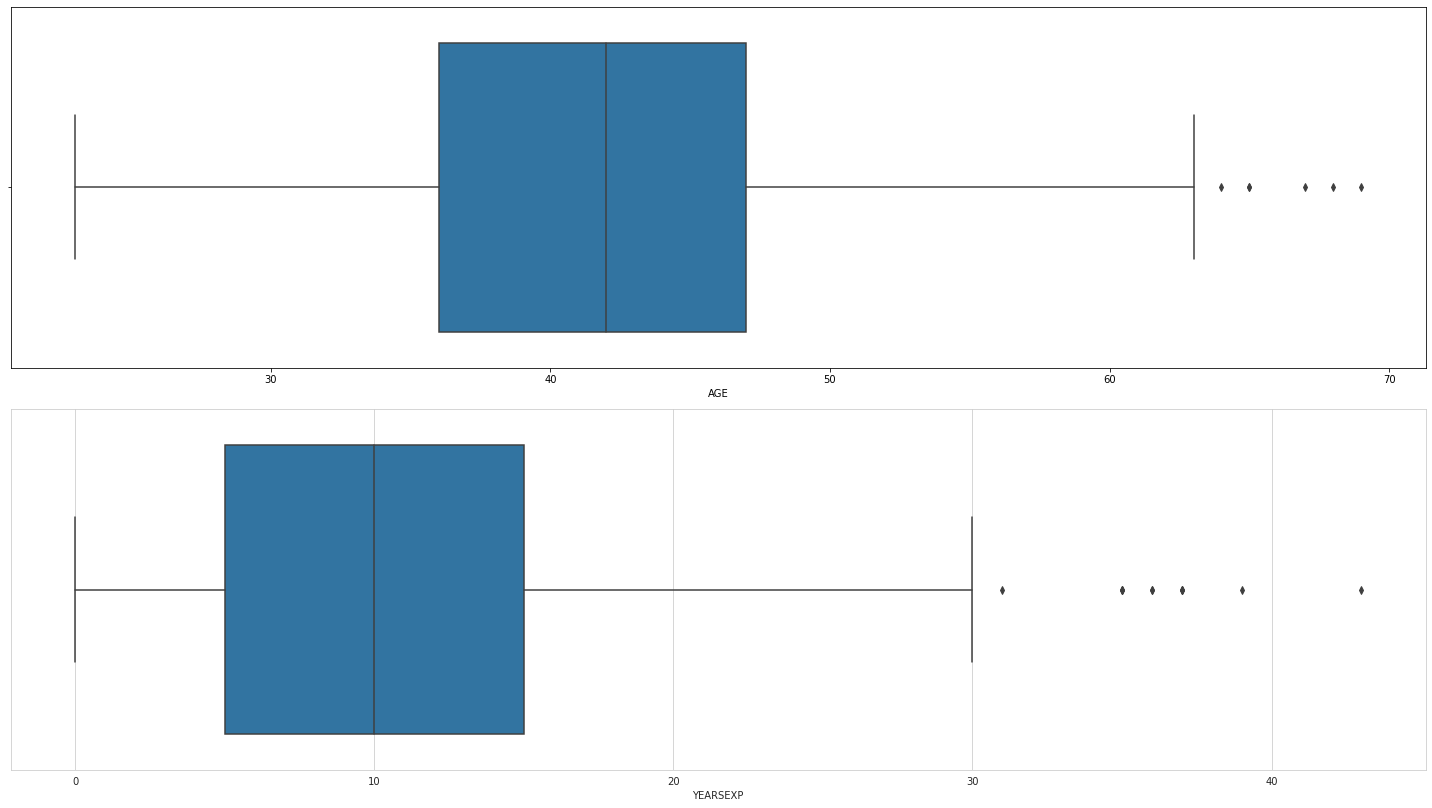

In [ ]:
#Cek data yang outlier(data yang angkanya jauh dari data lainnya)
fig = plt.figure(figsize=(20, 50))

for i in range(1, len(col_numeric)+1):
    ax = fig.add_subplot(9,1,i)
    sns.set_style('whitegrid')
    sns.boxplot(df_wiki[col_numeric[i-1]], orient='h')
    plt.tight_layout()

In [ ]:
#Mencari Quartile AGE
Q1_age = df_wiki['AGE'].quantile(0.25)
Q3_age = df_wiki['AGE'].quantile(0.75)
IQR_age = Q3_age - Q1_age

#Mencari Quartile YEARSEXP
Q1_yearsexp = df_wiki['YEARSEXP'].quantile(0.25)
Q3_yearsexp = df_wiki['YEARSEXP'].quantile(0.75)
IQR_yearsexp = Q3_yearsexp - Q1_yearsexp

print(IQR_age)
print(IQR_yearsexp)

11.0
10.0


In [ ]:
#Mencari Nilai Minimal dan Maksimum AGE
upper_limit_age = Q3_age + 1.5 * IQR_age
lower_limit_age = Q1_age - 1.5 * IQR_age

#Mencari Nilai Minimal dan Maksimum YEARSEXP
upper_limit_yearsexp = Q3_yearsexp + 1.5 * IQR_yearsexp
lower_limit_yearsexp = Q1_yearsexp - 1.5 * IQR_yearsexp

## DATA CLEANING

In [ ]:
#Menghilangkan outliers age
new_df_wiki = df_wiki.copy()
new_df_wiki['AGE'] = np.where(
    new_df_wiki['AGE'] > upper_limit_age,
    upper_limit_age,
    np.where(
        new_df_wiki['AGE'] < lower_limit_age,
        lower_limit_age,
        new_df_wiki['AGE']
    )
)

#Menghilangkan outliers yearsexp
new_df_wiki = df_wiki.copy()
new_df_wiki['YEARSEXP'] = np.where(
    new_df_wiki['YEARSEXP'] > upper_limit_yearsexp,
    upper_limit_yearsexp,
    np.where(
        new_df_wiki['YEARSEXP'] < lower_limit_yearsexp,
        lower_limit_yearsexp,
        new_df_wiki['YEARSEXP']
    )
)

In [ ]:
col_numeric2 = ['AGE','YEARSEXP']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


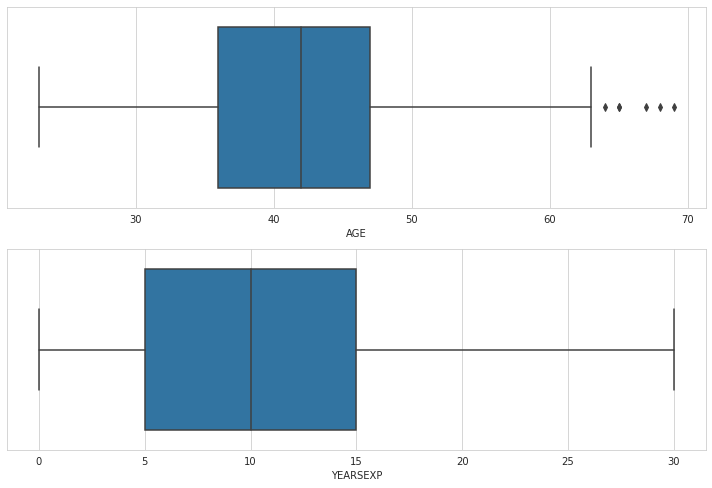

In [ ]:
#Mengecek fitur yang memiliki nilai outlier
fig = plt.figure(figsize=(10, 30))

for i in range(1, len(col_numeric2)+1):
    ax = fig.add_subplot(9,1,i)
    sns.set_style('whitegrid')
    sns.boxplot(new_df_wiki[col_numeric2[i-1]], orient='h')
    plt.tight_layout()

# Eksplorasi Data

## Summary Statistics

In [ ]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             913 non-null    int64 
 1   GENDER          913 non-null    int64 
 2   DOMAIN          913 non-null    object
 3   PhD             913 non-null    int64 
 4   YEARSEXP        913 non-null    int64 
 5   UNIVERSITY      913 non-null    int64 
 6   UOC_POSITION    913 non-null    object
 7   OTHER_POSITION  913 non-null    object
 8   OTHERSTATUS     913 non-null    object
 9   USERWIKI        913 non-null    object
 10  PU1             913 non-null    object
 11  PU2             913 non-null    object
 12  PU3             913 non-null    object
 13  PEU1            913 non-null    object
 14  PEU2            913 non-null    object
 15  PEU3            913 non-null    object
 16  ENJ1            913 non-null    object
 17  ENJ2            913 non-null    object
 18  Qu1       

In [ ]:
df_num = df_wiki[['AGE','GENDER','DOMAIN','PhD','YEARSEXP','UNIVERSITY','UOC_POSITION','OTHER_POSITION','OTHERSTATUS','USERWIKI','PU1','PU2','PU3','PEU1','PEU2','PEU3','ENJ1','ENJ2','Qu1','Qu2','Qu3','Qu4','Qu5','Vis1','Vis2','Vis3','Im1','Im2','Im3','SA1','SA2','SA3','Use1','Use2','Use3','Use4','Use5','Pf1','Pf2','Pf3','JR1','JR2','BI1','BI2','Inc1','Inc2','Inc3','Inc4','Exp1','Exp2','Exp3','Exp4','Exp5']]

In [ ]:
df_wiki.describe()

,AGE,GENDER,PhD,YEARSEXP,UNIVERSITY
count,913.000000,913.000000,913.000000,913.000000,913.000000
mean,42.246440,0.424973,0.464403,10.852136,1.123768
std,8.058418,0.494610,0.499005,7.357941,0.329497
min,23.000000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,0.000000,0.000000,5.000000,1.000000
50%,42.000000,0.000000,0.000000,10.000000,1.000000
75%,47.000000,1.000000,1.000000,15.000000,1.000000
max,69.000000,1.000000,1.000000,43.000000,2.000000


## Standard Deviansi



---


numpy.std(arr, axis = None) : Compute the standard deviation of the given data (array elements) along the specified axis(if any)..

Standard Deviation (SD) is measured as the spread of data distribution in the given data set.


---



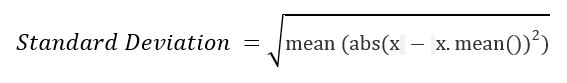

In [ ]:
df_num.std()

AGE           8.058418
GENDER        0.494610
PhD           0.499005
YEARSEXP      7.357941
UNIVERSITY    0.329497
dtype: float64

# EDA

## Univariate Analysis

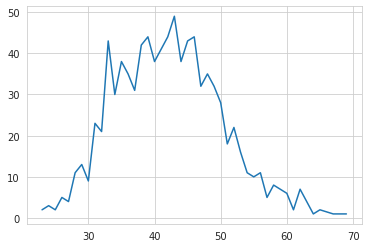

In [ ]:
fig = plt.figure(figsize=(6,4))
df_wiki['AGE'].value_counts().sort_index().plot.line()

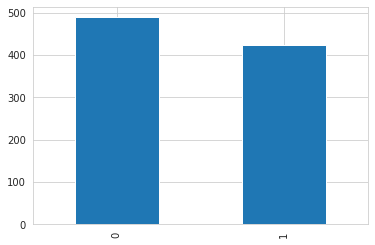

In [ ]:
fig = plt.figure(figsize=(6,4))
df_wiki['PhD'].value_counts().plot.bar()

## Bivariate Analysis

In [ ]:
biv = df_wiki.head(50)[['AGE','YEARSEXP']]

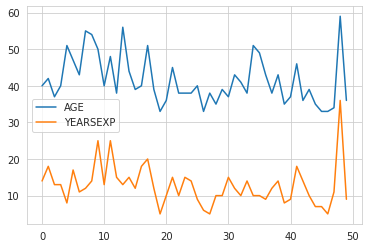

In [ ]:
biv.plot.line()

## Multivariate Analysis

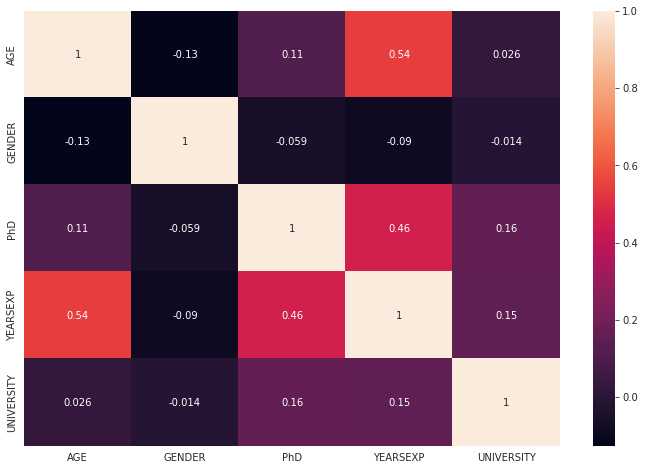

In [ ]:
fig = plt.figure(figsize=(12,8))
f = df_wiki.corr()
sns.heatmap(f, annot=True)



---


Each cell in this plot is the intersection of two variables; its color and label together indicate the amount of correlation between the two variables (how likely both variables are the increase or decrease at the same time). For example, in this dataset Agility and Acceleration are highly correlated, while Aggression and Balanced are very uncorrelated.

A correlation plot is a specific kind of heatmap. A heatmap maps one particular fact (in this case, correlation) about every pair of variables you chose from a dataset.


---



# NORMALISASI

Tidak dilakukan normalisasi karena angka dalam dataset tidak terlalu bervariasi

In [ ]:
#Mengecek apakah masih ada missing value berupa ?,NaN,-,dsb yang pada tiap kolom
print("AGE: ",(df_wiki['AGE'].unique()))
print("GENDER: ",(df_wiki['GENDER'].unique()))
print("PhD: ",(df_wiki['PhD'].unique()))
print("YEARSEXP: ",(df_wiki['YEARSEXP'].unique()))
print("UNIVERSITY: ",(df_wiki['UNIVERSITY'].unique()))
print("UOC_POSITION: ",(df_wiki['UOC_POSITION'].unique()))
print("OTHER_POSITION: ",(df_wiki['OTHER_POSITION'].unique()))
print("OTHERSTATUS: ",(df_wiki['OTHERSTATUS'].unique()))
print("USERWIKI: ",(df_wiki['USERWIKI'].unique()))
print("PU1: ",(df_wiki['PU1'].unique()))
print("PU2: ",(df_wiki['PU2'].unique()))
print("PU3: ",(df_wiki['PU3'].unique()))
print("PEU1: ",(df_wiki['PEU1'].unique()))
print("PEU2: ",(df_wiki['PEU2'].unique()))
print("PEU3: ",(df_wiki['PEU3'].unique()))
print("ENJ1: ",(df_wiki['ENJ1'].unique()))
print("ENJ2: ",(df_wiki['ENJ2'].unique()))
print("Qu1: ",(df_wiki['Qu1'].unique()))
print("Qu2: ",(df_wiki['Qu2'].unique()))
print("Qu3: ",(df_wiki['Qu3'].unique()))
print("Qu4: ",(df_wiki['Qu4'].unique()))
print("Qu5: ",(df_wiki['Qu5'].unique()))
print("Vis1: ",(df_wiki['Vis1'].unique()))
print("Vis2: ",(df_wiki['Vis2'].unique()))
print("Vis3: ",(df_wiki['Vis3'].unique()))
print("Im1: ",(df_wiki['Im1'].unique()))
print("Im2: ",(df_wiki['Im2'].unique()))
print("Im3: ",(df_wiki['Im3'].unique()))
print("SA1: ",(df_wiki['SA1'].unique()))
print("SA2: ",(df_wiki['SA2'].unique()))
print("SA3: ",(df_wiki['SA3'].unique()))
print("Use1: ",(df_wiki['Use1'].unique()))
print("Use2: ",(df_wiki['Use2'].unique()))
print("Use3: ",(df_wiki['Use3'].unique()))
print("Use4: ",(df_wiki['Use4'].unique()))
print("Use5: ",(df_wiki['Use5'].unique()))
print("Pf1: ",(df_wiki['Pf1'].unique()))
print("Pf2: ",(df_wiki['Pf2'].unique()))
print("Pf3: ",(df_wiki['Pf3'].unique()))
print("JR1: ",(df_wiki['JR1'].unique()))
print("JR2: ",(df_wiki['JR2'].unique()))
print("BT1: ",(df_wiki['BI1'].unique()))
print("BT2: ",(df_wiki['BI2'].unique()))
print("Inc1: ",(df_wiki['Inc1'].unique()))
print("Inc2: ",(df_wiki['Inc2'].unique()))
print("Inc3: ",(df_wiki['Inc3'].unique()))
print("Inc4: ",(df_wiki['Inc4'].unique()))
print("Exp1: ",(df_wiki['Exp1'].unique()))
print("Exp2: ",(df_wiki['Exp2'].unique()))
print("Exp3: ",(df_wiki['Exp3'].unique()))
print("Exp4: ",(df_wiki['Exp4'].unique()))
print("Exp5: ",(df_wiki['Exp5'].unique()))

AGE:  [40 42 37 51 47 43 55 54 50 48 38 56 44 39 33 36 45 35 41 49 46 34 59 32
 52 31 62 53 29 30 57 58 63 68 69 24 28 60 26 64 67 65 27 23 25 61]
GENDER:  [0 1]
PhD:  [1 0]
YEARSEXP:  [14 18 13  8 17 11 12 25 15 20  5 10  9  6  7 36 19  4  2 23 16  3 22 24
 21  1 35 27 26 30 28  0 37 43 31 39]
UNIVERSITY:  [1 2]
UOC_POSITION:  ['2' '3' '4' '5' '1' '6']
OTHER_POSITION:  ['2' '1']
OTHERSTATUS:  ['0' '7' '3' '2' '6' '4' '1' '5']
USERWIKI:  ['0' '1']
PU1:  ['4' '2' '3' '5' '1']
PU2:  ['4' '3' '2' '5' '1']
PU3:  ['3' '2' '4' '5' '1']
PEU1:  ['5' '4' '3' '2' '1']
PEU2:  ['5' '4' '3' '1' '2']
PEU3:  ['3' '5' '4' '2' '1']
ENJ1:  ['4' '3' '5' '2' '1']
ENJ2:  ['4' '3' '5' '2' '1']
Qu1:  ['3' '4' '2' '5' '1']
Qu2:  ['3' '4' '2' '5' '1']
Qu3:  ['2' '3' '4' '5' '1']
Qu4:  ['2' '3' '5' '4' '1']
Qu5:  ['3' '2' '4' '5' '1']
Vis1:  ['3' '2' '4' '5' '1']
Vis2:  ['3' '4' '2' '5' '1']
Vis3:  ['1' '2' '3' '4' '5']
Im1:  ['2' '1' '3' '4' '5']
Im2:  ['4' '2' '5' '3' '1']
Im3:  ['2' '1' '3' '4' '5']
SA1:  ['

In [ ]:
df_wiki

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,Qu3,Qu4,Qu5,Vis1,Vis2,Vis3,Im1,Im2,Im3,SA1,SA2,SA3,Use1,Use2,Use3,Use4,Use5,Pf1,Pf2,Pf3,JR1,JR2,BI1,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,2,0,0,4,4,3,5,5,3,4,4,3,3,2,2,3,3,3,1,2,4,2,4,4,4,3,1,1,2,4,1,1,3,4,1,2,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,2,0,0,2,3,3,4,4,3,3,4,4,4,3,3,2,3,3,1,1,2,1,4,4,4,2,2,1,1,2,1,1,1,4,3,2,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,2,0,0,2,2,2,4,4,3,3,3,2,2,2,5,3,2,3,2,2,4,3,4,2,4,1,1,1,1,1,3,3,3,4,3,1,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,2,0,0,3,3,4,3,3,3,4,3,3,4,3,3,3,3,4,3,2,2,3,5,5,5,3,3,3,3,3,4,4,4,5,4,3,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,2,0,1,4,3,5,5,4,3,4,4,4,5,4,3,4,4,4,4,3,2,3,5,5,5,3,3,5,5,5,5,5,5,3,3,5,5,5,5,4,4,5,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5,1,21,2,6,2,2,0,3,3,3,5,5,2,4,5,3,3,4,5,2,2,2,1,2,2,2,3,3,4,1,1,2,2,2,1,2,1,5,4,2,2,2,2,2,2,4,4,4,1,1
909,53,0,6,0,25,2,6,2,6,0,3,3,4,5,4,3,4,4,4,4,4,3,3,2,3,3,2,4,2,5,4,5,3,2,3,3,5,2,2,4,3,3,4,4,4,3,3,4,4,4,4,1,1
910,39,0,5,1,9,2,6,2,4,0,3,3,3,5,4,3,3,4,3,3,2,5,2,2,4,1,1,2,3,4,5,4,3,1,1,1,3,5,5,3,3,1,2,2,5,4,3,3,5,5,5,4,1
911,40,0,3,1,10,2,6,2,2,0,3,3,5,5,4,2,4,4,4,4,3,2,5,3,2,5,4,5,4,5,5,5,3,1,5,5,4,1,2,4,4,2,5,5,1,5,2,2,4,4,2,1,1


In [ ]:
from sklearn import preprocessing

cols = new_df_wiki.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(new_df_wiki)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized

ValueError: ignored